In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

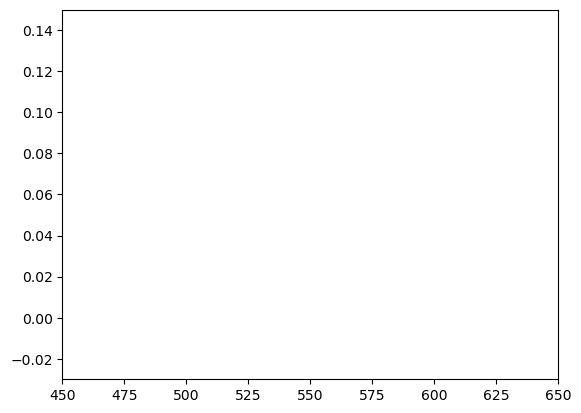

In [2]:
fig, ax = plt.subplots()

ax.set_xlim(( 450., 650.))
ax.set_ylim((- 0.03, 0.15))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

## Forward Time, Centered Space (FTCS)

In [3]:
def advective_step(q=None, dx=None, dt=None, v=None):
    qnew = np.zeros(len(q))
    qnew[1:-1] = q[1:-1] - dt * v * (q[2:] - q[0:-2]) / (2. * dx)
    return(qnew)

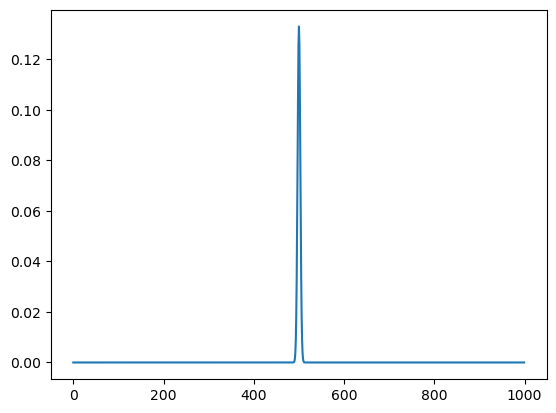

In [4]:
dx = 1.
v = 1.
dt = 0.1 # note that we will definitely want dt < (dx / v)
n = 1000
sig = 3.
start = np.float64(n // 2) 
x = np.arange(n)
qstart = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
plt.plot(x, qstart)

In [5]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_step(q=q[i, :], dx=dx, dt=dt, v=v)

In [6]:
def frame(i):
    line.set_data(x, q[i, :])
    return (line,)

In [7]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

## Lax Method

In [8]:
def advective_lax_step(q=None, dx=None, dt=None, v=None):
    qnew = np.zeros(len(q))
    qnew[1:-1] = 0.5 * (q[0:-2] + q[2:]) - dt * v * (q[2:] - q[0:-2]) / (2. * dx)
    return(qnew)

In [9]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v, v=v)

In [10]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [11]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 1.1, v=v)

In [12]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [13]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.9, v=v)

In [14]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [15]:
sig = 30.
qstart = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
ax.set_xlim(( 450., 750.))
ax.set_ylim((- 0.03, 0.05))

(-0.03, 0.05)

In [26]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.2, v=v)

In [27]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [18]:
wavelength = 20. 
qstart = np.cos(2. * np.pi * x  / wavelength)
ax.set_xlim(( 450., 750.))
ax.set_ylim((- 1.05, 1.05))

(-1.05, 1.05)

In [19]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.5, v=v)

In [20]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [21]:
wavelength = 200. 
qstart = np.cos(2. * np.pi * x  / wavelength)
ax.set_xlim(( 450., 750.))
ax.set_ylim((- 1.05, 1.05))

(-1.05, 1.05)

In [22]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.5, v=v)

In [23]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

## Leapfrog Method

In [43]:
def advective_leapfrog_step(q=None, qold=None, dx=None, dt=None, v=None):
    qnew = np.zeros(len(q))
    qnew[1:-1] = qold[1:-1] - dt * v * (q[2:] - q[0:-2]) / (dx)
    return(qnew)

In [47]:
sig = 10.
qold = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
qstart = advective_lax_step(q=qold, dx=dx, dt=dx / v * 0.5, v=v)

In [48]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_leapfrog_step(q=q[i, :], qold=qold, dx=dx, dt=dx / v * 1.5, v=v)
    qold = q[i, :]

/Users/blanton/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in subtract
  app.launch_new_instance()
/Users/blanton/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/blanton/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


In [49]:
ax.set_ylim((- 0.01, 0.05))
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

## Diffusion Equation

In [50]:
def diffusion_ftcs_step(q=None, dt=None, dx=None, D=None):
    alpha = D * dt / dx**2
    qnew = np.zeros(q.shape)
    qnew[1:-1] = q[1:-1] + alpha * (q[0:-2] - 2. * q[1:-1] + q[2:])
    return(qnew)

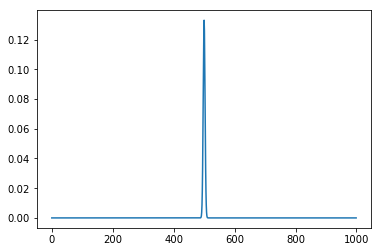

In [51]:
dx = 1.
D = 1.
n = 1000
sig = 3.
start = np.float64(n // 2) 
x = np.arange(n)
qstart = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
plt.plot(x, qstart)

In [52]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = diffusion_ftcs_step(q=q[i, :], dx=dx, dt=dx**2 / D * 0.5, D=D)

In [41]:
ax.set_ylim((- 0.01, 0.15))
ax.set_xlim((200., 800.))
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())